In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
homicidios = pd.read_csv("homicidios.csv")
lesiones = pd.read_csv("lesiones.csv")

## EDA Homicidios ##

In [3]:
#Vemos los tipos de datos
homicidios.dtypes

ID                        object
N_VICTIMAS               float64
FECHA                     object
AAAA                     float64
MM                       float64
DD                       float64
HORA                      object
HH                        object
LUGAR_DEL_HECHO           object
TIPO_DE_CALLE             object
Calle                     object
Altura                   float64
Cruce                     object
Dirección Normalizada     object
COMUNA                   float64
XY (CABA)                 object
pos x                     object
pos y                     object
PARTICIPANTES             object
VICTIMA                   object
ACUSADO                   object
dtype: object

In [4]:
homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58,-35,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-59,-35,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58,-35,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58,-35,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58,-35,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
homicidios.isna().mean()

ID                       0.933670
N_VICTIMAS               0.933670
FECHA                    0.933670
AAAA                     0.933670
MM                       0.933670
DD                       0.933670
HORA                     0.933670
HH                       0.933670
LUGAR_DEL_HECHO          0.933670
TIPO_DE_CALLE            0.933670
Calle                    0.933765
Altura                   0.987706
Cruce                    0.949967
Dirección Normalizada    0.934432
COMUNA                   0.933670
XY (CABA)                0.933670
pos x                    0.933670
pos y                    0.933670
PARTICIPANTES            0.933670
VICTIMA                  0.933670
ACUSADO                  0.933670
dtype: float64

Vemos que el dataset de homicidios tiene muchos datos nulos y muchas de esas columnas tienen todas las columnas vacias, asi que hay que eliminarlas

In [6]:
#Eliminamos las filas que tengan 5 columnas o mas con datos nulos
homicidios.dropna(thresh=5, inplace=True)

In [7]:
#Chequeamos los nulos
homicidios.isna().mean()

ID                       0.000000
N_VICTIMAS               0.000000
FECHA                    0.000000
AAAA                     0.000000
MM                       0.000000
DD                       0.000000
HORA                     0.000000
HH                       0.000000
LUGAR_DEL_HECHO          0.000000
TIPO_DE_CALLE            0.000000
Calle                    0.001437
Altura                   0.814655
Cruce                    0.245690
Dirección Normalizada    0.011494
COMUNA                   0.000000
XY (CABA)                0.000000
pos x                    0.000000
pos y                    0.000000
PARTICIPANTES            0.000000
VICTIMA                  0.000000
ACUSADO                  0.000000
dtype: float64

In [47]:
#Chequeamos los datos duplicados y vemos que no hay ninguno
homicidios.duplicated().sum()

0

In [8]:
homicidios.describe(include="all")

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
count,696,696.000000,696,696.000000,696.000000,696.000000,696,696,696,696,...,129.000000,525,688,696.000000,696,696,696,696,696,696
unique,696,NaN,598,NaN,NaN,NaN,346,25,683,4,...,NaN,317,635,NaN,606,5,4,41,10,10
top,2016-0001,NaN,12/18/2018,NaN,NaN,NaN,21:00:00,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,"PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,NaN,Point (. .),-58,-35,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,3,NaN,NaN,NaN,10,41,4,429,...,NaN,14,5,NaN,14,602,682,105,295,204
mean,NaN,1.030172,NaN,2018.188218,6.692529,15.936782,NaN,NaN,NaN,NaN,...,3336.635659,NaN,NaN,7.425287,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.179393,NaN,1.683754,3.571309,8.639646,NaN,NaN,NaN,NaN,...,3060.641793,NaN,NaN,4.387050,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,30.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,...,1359.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,...,2551.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2020.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,4500.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Agrupamos por año y sumamos el numero total de victimas
total_por_año = homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

In [10]:
total_por_año

,AAAA,N_VICTIMAS
0,2016.0,146.0
1,2017.0,140.0
2,2018.0,149.0
3,2019.0,104.0
4,2020.0,81.0
5,2021.0,97.0


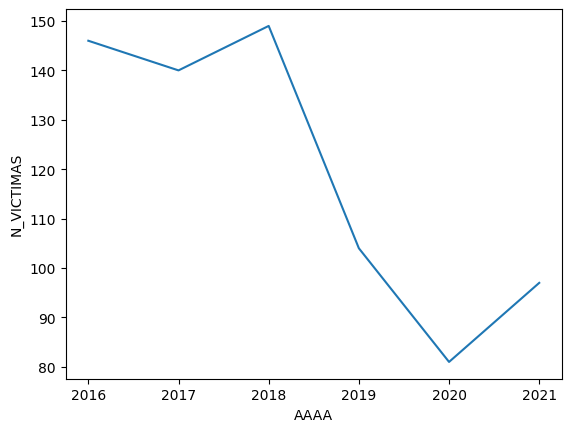

In [11]:
#Graficamos el total de victimas por año
sns.lineplot(data=total_por_año, x="AAAA", y="N_VICTIMAS")
plt.show()

Podemos ver que del 2016 al 2019 morían mas de 100 personas al año por accidentes de tránsito, pero este numero en 2020 y 2021 se redujo mucho debido a la pandemia ya que las personas circulaban menos por la calle

In [12]:
#Agrupamos por la fecha y sumamos el numero de victimas
total_por_dia = homicidios.groupby("FECHA")["N_VICTIMAS"].sum().reset_index()
#Chequeamos el valor maximo de muertes en un dia
total_por_dia["N_VICTIMAS"].max()

3.0

In [13]:
#Filtramos en que dias murieron 3 personas
total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0]

,FECHA,N_VICTIMAS
15,1/16/2017,3.0
119,11/19/2017,3.0
136,11/26/2016,3.0
163,12/11/2017,3.0
168,12/12/2018,3.0
180,12/18/2018,3.0
191,12/22/2018,3.0
196,12/25/2020,3.0
213,12/5/2020,3.0
226,2/17/2016,3.0


In [14]:
#Nos fijamos en cuantos dias murieron 3 personas
len(total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0])

17

In [15]:
#El promedio de muertes que hay cuando se produce un accidente de transito
homicidios["N_VICTIMAS"].mean()

1.0301724137931034

In [16]:
#Agrupamos por comuna y sumamos el numero de victimas
victimas_por_comuna = homicidios.groupby("COMUNA")["N_VICTIMAS"].sum().reset_index()
victimas_por_comuna

,COMUNA,N_VICTIMAS
0,0.0,2.0
1,1.0,93.0
2,2.0,25.0
3,3.0,46.0
4,4.0,79.0
5,5.0,22.0
6,6.0,22.0
7,7.0,62.0
8,8.0,67.0
9,9.0,75.0


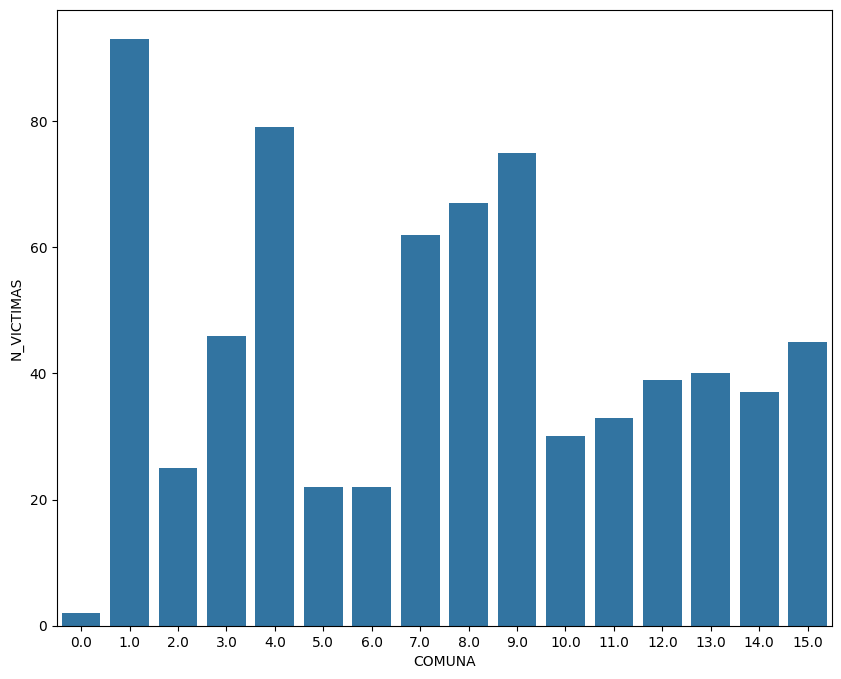

In [17]:
#Graficamos el dataframe
figura = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_comuna, x="COMUNA", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que la comuna con mas victimas es la comuna 1. Esto puede ser causado porque la comuna 1 tiene muchos barrios que son muy transitados, con lo que aumenta el numero de victimas

In [18]:
#Agrupamos por mes y sumamos el numero de victimas
victimas_por_mes = homicidios.groupby("MM")["N_VICTIMAS"].sum().reset_index()
victimas_por_mes

,MM,N_VICTIMAS
0,1.0,62.0
1,2.0,59.0
2,3.0,56.0
3,4.0,52.0
4,5.0,60.0
5,6.0,58.0
6,7.0,51.0
7,8.0,67.0
8,9.0,51.0
9,10.0,52.0


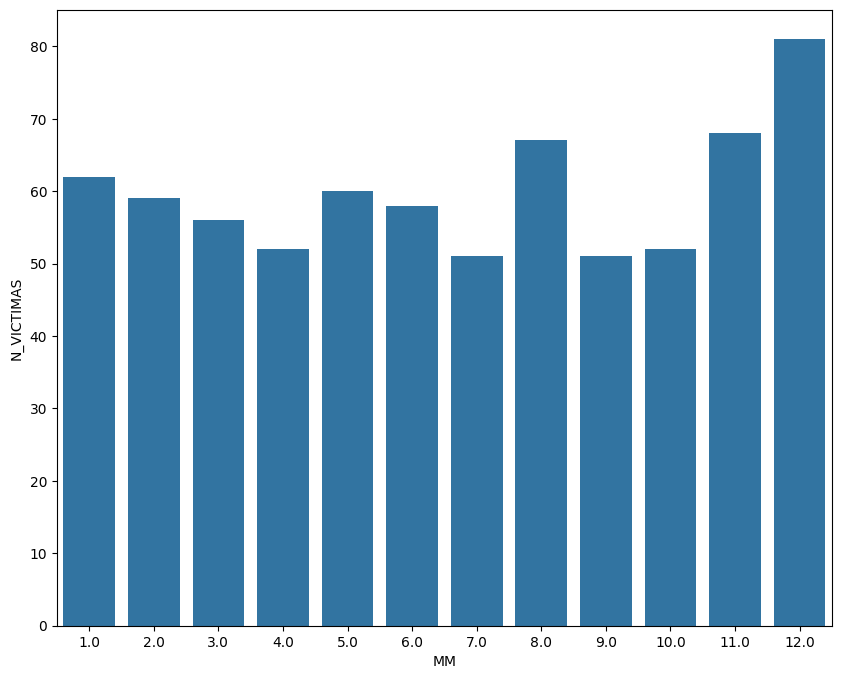

In [19]:
#Graficamos el dataframe
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_mes, x="MM", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que el mayor numero de victimas es en diciembre

In [20]:
victimas_por_tipocalle = homicidios.groupby("TIPO_DE_CALLE")["N_VICTIMAS"].sum().reset_index()
victimas_por_tipocalle

,TIPO_DE_CALLE,N_VICTIMAS
0,AUTOPISTA,68.0
1,AVENIDA,442.0
2,CALLE,138.0
3,GRAL PAZ,69.0


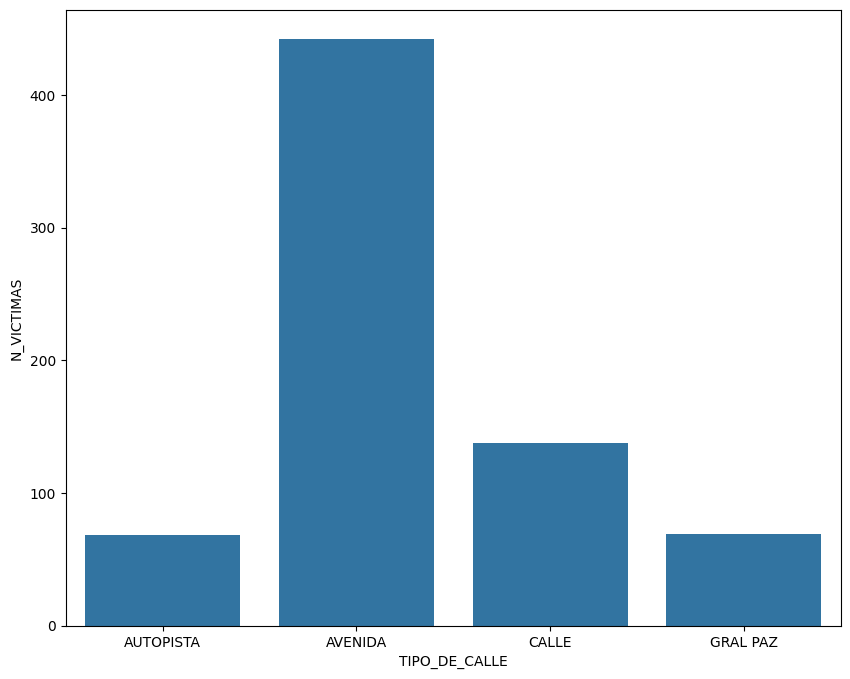

In [21]:
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_tipocalle, x="TIPO_DE_CALLE", y="N_VICTIMAS")
plt.show()

El mayor numero de victimas lo tienen las avenidas, esto puede ser porque circulan mas vehiculos y peatones que en otros lugares

In [22]:
#Agrupamos por participantes y sumamos el numero de victimas
total_por_participantes = homicidios.groupby("PARTICIPANTES")["N_VICTIMAS"].sum().reset_index()
total_por_participantes

,PARTICIPANTES,N_VICTIMAS
0,AUTO-AUTO,33.0
1,AUTO-CARGAS,15.0
2,AUTO-MOVIL,1.0
3,AUTO-OBJETO FIJO,28.0
4,AUTO-PASAJEROS,10.0
5,AUTO-SD,4.0
6,BICICLETA-AUTO,8.0
7,BICICLETA-CARGAS,10.0
8,BICICLETA-OTRO,1.0
9,BICICLETA-PASAJEROS,8.0


In [23]:
#Vemos el valor maximo de victimas del dataframe
total_por_participantes["N_VICTIMAS"].max()

105.0

In [24]:
#Vemos que participantes tienen el numero maximo de victimas
total_por_participantes[total_por_participantes["N_VICTIMAS"] == 105.0]

,PARTICIPANTES,N_VICTIMAS
34,PEATON-PASAJEROS,105.0


El mayor numero de victimas lo tiene el tipo de homicidio de peaton-pasajeros

In [25]:
#Agrupamos por la hora aproximada y sumamos el numero de victimas
total_por_hh = homicidios.groupby("HH")["N_VICTIMAS"].sum().reset_index()

In [26]:
#Eliminamos la ultima fila que no dice una hora si no que dice SD
total_por_hh = total_por_hh.drop(24)
#Pasamos la columna a entero
total_por_hh["HH"] = total_por_hh["HH"].astype(int)
#Ordenamos por hora
total_por_hh.sort_values(by="HH", inplace=True, ascending=True)
total_por_hh.reset_index(drop=True, inplace=True)
total_por_hh

,HH,N_VICTIMAS
0,0,23.0
1,1,25.0
2,2,18.0
3,3,26.0
4,4,27.0
5,5,39.0
6,6,42.0
7,7,43.0
8,8,31.0
9,9,37.0


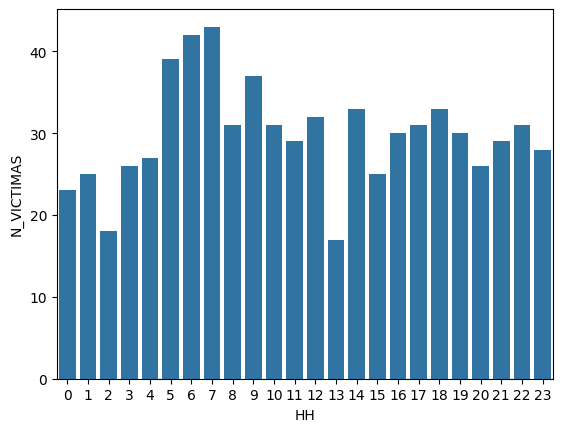

In [27]:
sns.barplot(data = total_por_hh, x="HH", y="N_VICTIMAS")
plt.show()

Vemos que en la hora que mas probable es que ocurra un accidente de transito es a las 7 AM y que a la mañana entre las 5 y las 7 tambien suceden muchos de los accidentes

In [28]:
#Agrupamos por la hora aproximada y sumamos el numero de victimas
total_victimas = homicidios.groupby("VICTIMA")["N_VICTIMAS"].sum().reset_index()
total_victimas

,VICTIMA,N_VICTIMAS
0,AUTO,92.0
1,BICICLETA,29.0
2,CARGAS,7.0
3,MOTO,302.0
4,MOVIL,3.0
5,OBJETO FIJO,2.0
6,PASAJEROS,5.0
7,PEATON,266.0
8,PEATON_MOTO,2.0
9,SD,9.0


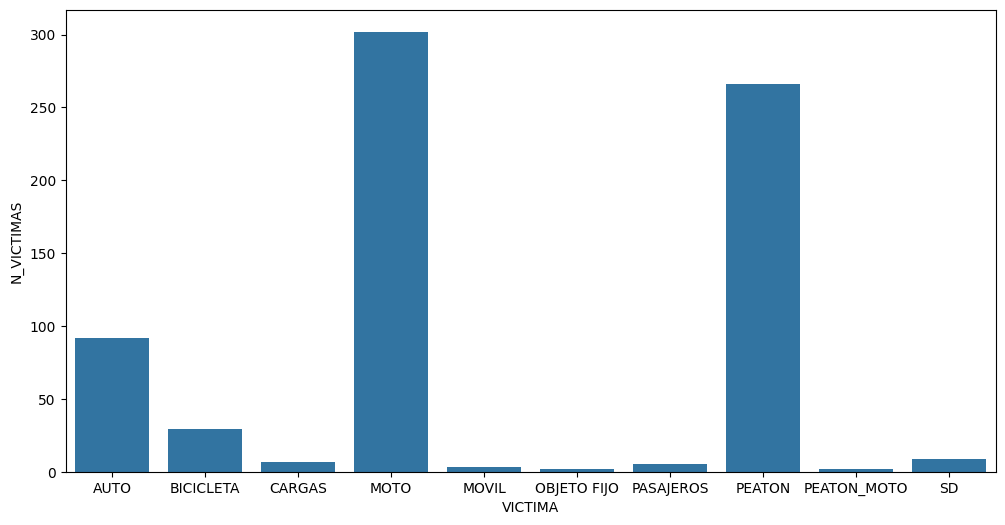

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data = total_victimas, x="VICTIMA", y="N_VICTIMAS")
plt.show()

Podemos ver que la mayoria de las victimas son motos y peatones

## Lesiones ##

In [30]:
lesiones

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,1/1/2019,9:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,1/1/2019,1:55,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,1/1/2019,2:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,1/1/2019,2:30,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,1/1/2019,4:30,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,12/31/2021,19:30,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,12/31/2021,19:40,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,12/31/2021,20:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,12/31/2021,22:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [31]:
lesiones.dtypes

id                        object
n_victimas                 int64
aaaa                       int64
mm                         int64
dd                         int64
fecha                     object
hora                      object
franja_hora               object
direccion_normalizada     object
comuna                    object
tipo_calle                object
otra_direccion            object
calle                     object
altura                   float64
cruce                     object
geocodificacion_CABA      object
longitud                  object
latutid                   object
victima                   object
acusado                   object
participantes             object
moto                      object
auto                      object
transporte_publico        object
camion                    object
ciclista                  object
gravedad                  object
dtype: object

In [32]:
lesiones.describe(include="all")

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
count,23785,23785.000000,23785.000000,23785.000000,23785.000000,23785,23785,23780,23732,23616,...,23523,23785,23785,23785,23692,23692,23692,23692,23692,23785
unique,23785,NaN,NaN,NaN,NaN,1096,2000,25,8933,17,...,13757,14,14,128,3,3,3,3,3,5
top,LC-2019-0000179,NaN,NaN,NaN,NaN,12/17/2021,0:00,17,SD,1,...,SD,SD,SD,SD-SD,x,SD,SD,SD,SD,SD
freq,1,NaN,NaN,NaN,NaN,55,359,1734,10815,2526,...,1209,10733,15288,10535,9077,12543,11801,12708,11353,23056
mean,NaN,1.160563,2019.901324,6.597561,15.616355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.551571,0.859432,3.476955,8.700047,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,2019.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2019.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2020.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2021.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
lesiones.isna().mean()

id                       0.000000
n_victimas               0.000000
aaaa                     0.000000
mm                       0.000000
dd                       0.000000
fecha                    0.000000
hora                     0.000000
franja_hora              0.000210
direccion_normalizada    0.002228
comuna                   0.007105
tipo_calle               0.000000
otra_direccion           0.000000
calle                    0.459029
altura                   0.463065
cruce                    0.604499
geocodificacion_CABA     0.001640
longitud                 0.011015
latutid                  0.011015
victima                  0.000000
acusado                  0.000000
participantes            0.000000
moto                     0.003910
auto                     0.003910
transporte_publico       0.003910
camion                   0.003910
ciclista                 0.003910
gravedad                 0.000000
dtype: float64

In [48]:
#Chequeamos la cantidad de datos duplicados
lesiones.duplicated().sum()

0

In [34]:
lesiones_por_año = lesiones.groupby("aaaa")["n_victimas"].sum().reset_index()
lesiones_por_año

,aaaa,n_victimas
0,2019,11792
1,2020,6855
2,2021,8957


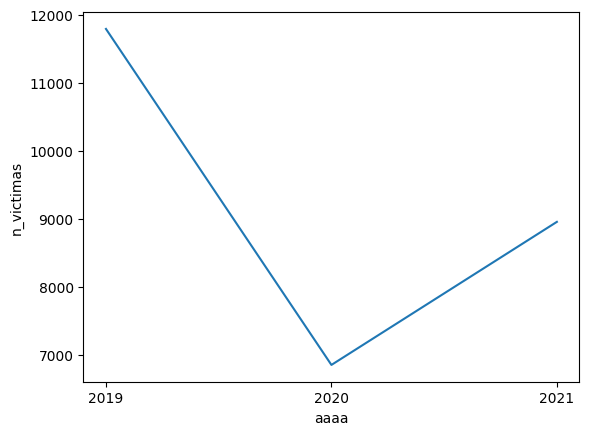

In [35]:
sns.lineplot(data=lesiones_por_año, x="aaaa", y="n_victimas")
plt.xticks(range(min(lesiones_por_año['aaaa']), max(lesiones_por_año['aaaa'])+1, 1))
plt.show()

Podemos ver que los numeros de victimas que tuvieron lesiones disminuyeron por la pandemia, ya que transitaba menos gente

In [36]:
lesiones_por_mes = lesiones.groupby("mm")["n_victimas"].sum().reset_index()
lesiones_por_mes

,mm,n_victimas
0,1,2229
1,2,2290
2,3,2501
3,4,2034
4,5,1892
5,6,2153
6,7,2360
7,8,2420
8,9,2363
9,10,2762


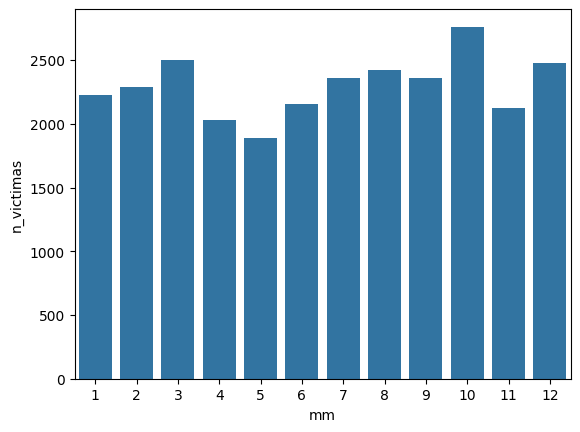

In [37]:
sns.barplot(data = lesiones_por_mes, x="mm", y="n_victimas")
plt.show()

El numero de victimas mas alto se da en octubre pero no varia tanto

In [38]:
#Agrupamos por la franja horaria y sumamos el numero de victimas
lesiones_por_franja = lesiones.groupby("franja_hora")["n_victimas"].sum().reset_index()
#Eliminamos la columna que tiene sd
lesiones_por_franja = lesiones_por_franja[lesiones_por_franja["franja_hora"] != "sd"]
#Cambiamos el tipo de la columna por int para poder ordenarla
lesiones_por_franja["franja_hora"] = lesiones_por_franja["franja_hora"].astype(int)

In [39]:
#Ordenamos los valores por la franja horaria de manera ascendente
lesiones_por_franja = lesiones_por_franja.sort_values(by="franja_hora", ascending=True)
#Reseteamos los indices
lesiones_por_franja.reset_index(drop=True, inplace= True)
lesiones_por_franja

,franja_hora,n_victimas
0,0,923
1,1,420
2,2,275
3,3,207
4,4,229
5,5,347
6,6,523
7,7,835
8,8,1234
9,9,1290


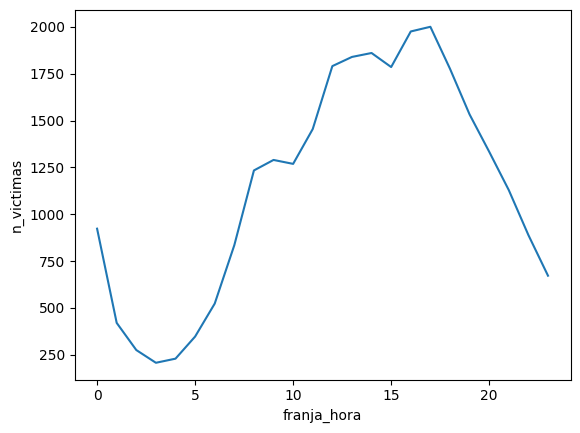

In [40]:
sns.lineplot(data = lesiones_por_franja, x="franja_hora", y="n_victimas")
plt.show()

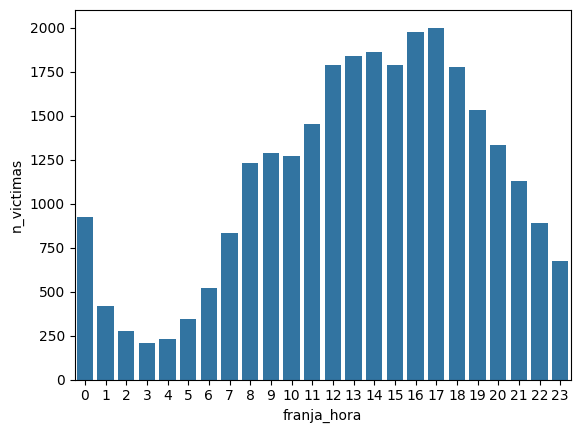

In [41]:
sns.barplot(data = lesiones_por_franja, x= "franja_hora", y="n_victimas")
plt.show()

Vemos que entre las 12 am y las 5 am disminuyen los accidentes, luego a partir de las 6 am comienzan a subir y tiende a bajar a partir de las 6 aproximadamente

In [42]:
#Agrupamos por el tipo de victimas y sumamos el numero de victimas
lesiones_victimas = lesiones.groupby("victima")["n_victimas"].sum().reset_index()
lesiones_victimas

,victima,n_victimas
0,AUTO,2606
1,CAMION,96
2,CAMIONETA,257
3,CICLISTA,2263
4,MIXTO,113
5,MONOPATIN,28
6,MOTO,5927
7,MOVIL,139
8,OTRO,26
9,PEATON,2157


In [43]:
#Agrupamos por comunas y sumamos el numero de victimas
lesiones_por_comuna = lesiones.groupby("comuna")["n_victimas"].sum().reset_index()
#Eliminamos los datos sin especificar
lesiones_por_comuna = lesiones_por_comuna[lesiones_por_comuna["comuna"] != "SD"]
lesiones_por_comuna = lesiones_por_comuna[lesiones_por_comuna["comuna"] != "No Especificada"]

#Cambiamos el tipo de dato de la columna a entero para ordenarlo de menor a mayor
lesiones_por_comuna["comuna"] = lesiones_por_comuna["comuna"].astype(int)

#Ordenamos las comunas
lesiones_por_comuna = lesiones_por_comuna.sort_values(by="comuna")

lesiones_por_comuna

,comuna,n_victimas
0,1,2838
7,2,996
8,3,1957
9,4,2134
10,5,1378
11,6,1082
12,7,1757
13,8,1353
14,9,2075
1,10,1538


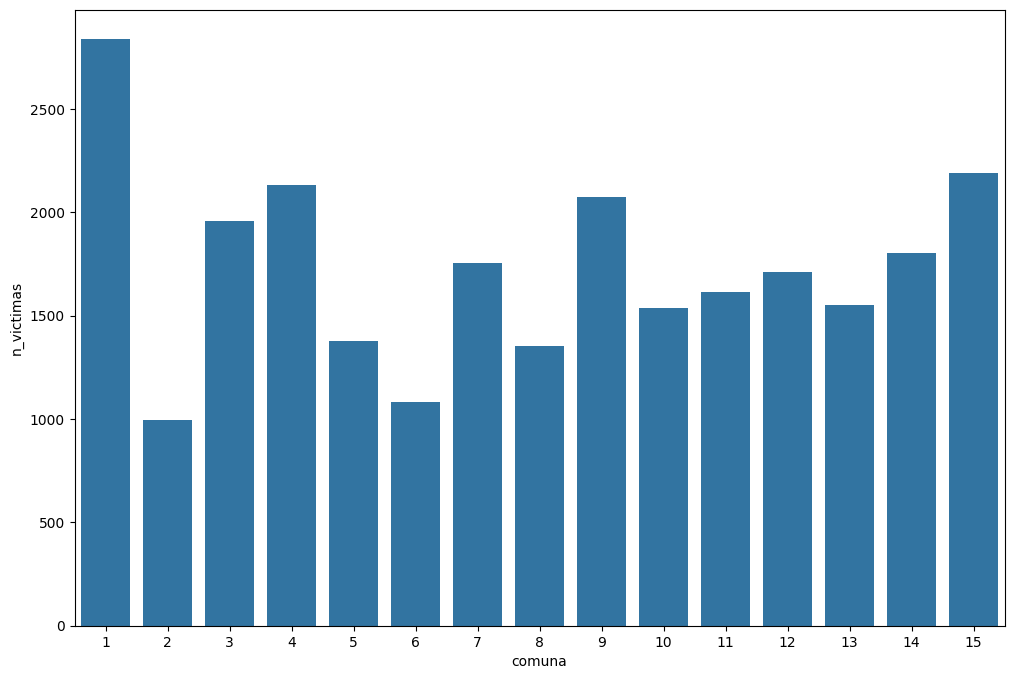

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(data = lesiones_por_comuna, x="comuna", y="n_victimas")
plt.show()

Vemos que nuevamente el numero de victimas pero ahora de lesiones es el mas alto en la comuna 1

In [45]:
lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,1/1/2019,9:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,1/1/2019,1:55,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,1/1/2019,2:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,1/1/2019,2:30,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,1/1/2019,4:30,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
